# Rozdział 12. Przetwarzanie i analiza danych w `pandas`

In [4]:
# %matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

import pandas as pd
# pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier

import matplotlib as mpl
mpl.style.use('ggplot')

import seaborn as sns

## Typ Series

In [13]:
s = pd.Series([909976, 8615246, 2872086, 2273305])
s

0     909976
1    8615246
2    2872086
3    2273305
dtype: int64

In [14]:
type(s), s.dtype

(pandas.core.series.Series, dtype('int64'))

In [15]:
s.index, s.values

(RangeIndex(start=0, stop=4, step=1),
 array([ 909976, 8615246, 2872086, 2273305]))

In [16]:
s.index = ["Sztokholm", "Londyn", "Rzym", "Paryż"] 
s.name = "Populacja"
s

Sztokholm     909976
Londyn       8615246
Rzym         2872086
Paryż        2273305
Name: Populacja, dtype: int64

In [17]:
s = pd.Series(
        [909976, 8615246, 2872086, 2273305], 
        index=["Sztokholm", "Londyn", "Rzym", "Paryż"], 
        name="Populacja")

In [18]:
s["Londyn"]

8615246

In [19]:
s.Sztokholm

909976

In [20]:
s[["Paryż", "Rzym"]]

Paryż    2273305
Rzym     2872086
Name: Populacja, dtype: int64

In [21]:
s.median(), s.mean(), s.std()

(2572695.5, 3667653.25, 3399048.5005155364)

In [22]:
s.min(), s.max()

(909976, 8615246)

In [23]:
s.quantile(q=0.25), s.quantile(q=0.5), s.quantile(q=0.75)

(1932472.75, 2572695.5, 4307876.0)

In [24]:
s.describe()

count    4.000000e+00
mean     3.667653e+06
std      3.399049e+06
min      9.099760e+05
25%      1.932473e+06
50%      2.572696e+06
75%      4.307876e+06
max      8.615246e+06
Name: Populacja, dtype: float64

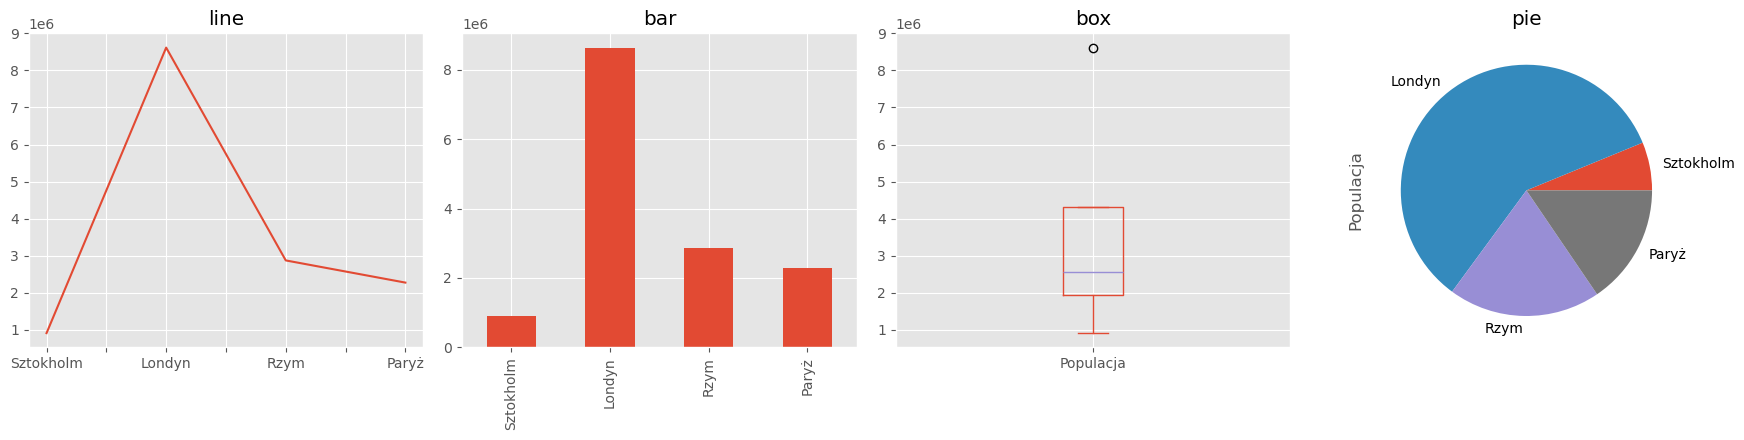

In [25]:
fig, axes = plt.subplots(1, 4, figsize=(18, 4.5))

s.plot(ax=axes[0], kind='line', title="line")
s.plot(ax=axes[1], kind='bar', title="bar")
s.plot(ax=axes[2], kind='box', title="box")
s.plot(ax=axes[3], kind='pie', title="pie")

fig.tight_layout();

## Typ DataFrame

In [26]:
df = pd.DataFrame([[909976, 8615246, 2872086, 2273305],
                   ["Sztokholm", "Londyn", "Rzym", "Paryż"]])
df

,0,1,2,3
0,909976,8615246,2872086,2273305
1,Sztokholm,Londyn,Rzym,Paryż


In [27]:
df = pd.DataFrame([[909976, "Szwecja"],
                   [8615246, "Wlk. Brytania"], 
                   [2872086, "Włochy"],
                   [2273305, "Francja"]])
df

,0,1
0,909976,Szwecja
1,8615246,Wlk. Brytania
2,2872086,Włochy
3,2273305,Francja


In [28]:
df.index = ["Sztokholm", "Londyn", "Rzym", "Paryż"]
df.columns = ["Populacja", "Państwo"]
df

,Populacja,Państwo
Sztokholm,909976,Szwecja
Londyn,8615246,Wlk. Brytania
Rzym,2872086,Włochy
Paryż,2273305,Francja


In [29]:
df = pd.DataFrame([[909976, "Szwecja"],
                   [8615246, "Wlk. Brytania"], 
                   [2872086, "Włochy"],
                   [2273305, "Francja"]],
                  index=["Sztokholm", "Londyn", "Rzym", "Paryż"],
                  columns=["Populacja", "Państwo"])
df

,Populacja,Państwo
Sztokholm,909976,Szwecja
Londyn,8615246,Wlk. Brytania
Rzym,2872086,Włochy
Paryż,2273305,Francja


In [31]:
df = pd.DataFrame({"Populacja": [909976, 8615246, 2872086, 2273305],
        "Państwo": ["Szwecja", "Wlk. Brytania", "Włochy", "Francja"]},
        index=["Sztokholm", "Londyn", "Rzym", "Paryż"])
df

,Populacja,Państwo
Sztokholm,909976,Szwecja
Londyn,8615246,Wlk. Brytania
Rzym,2872086,Włochy
Paryż,2273305,Francja


In [32]:
df.index

Index(['Sztokholm', 'Londyn', 'Rzym', 'Paryż'], dtype='object')

In [33]:
df.columns

Index(['Populacja', 'Państwo'], dtype='object')

In [34]:
df.values

array([[909976, 'Szwecja'],
       [8615246, 'Wlk. Brytania'],
       [2872086, 'Włochy'],
       [2273305, 'Francja']], dtype=object)

In [35]:
df.Populacja

Sztokholm     909976
Londyn       8615246
Rzym         2872086
Paryż        2273305
Name: Populacja, dtype: int64

In [36]:
df["Populacja"]

Sztokholm     909976
Londyn       8615246
Rzym         2872086
Paryż        2273305
Name: Populacja, dtype: int64

In [37]:
type(df.Populacja)

pandas.core.series.Series

In [38]:
df.Populacja.Sztokholm

909976

In [40]:
type(df.index)

pandas.core.indexes.base.Index

In [41]:
df.loc["Sztokholm"]

Populacja     909976
Państwo      Szwecja
Name: Sztokholm, dtype: object

In [42]:
type(df.loc["Sztokholm"])

pandas.core.series.Series

In [43]:
df.loc[["Paryż", "Rzym"]]

,Populacja,Państwo
Paryż,2273305,Francja
Rzym,2872086,Włochy


In [44]:
df.loc[["Paryż", "Rzym"], "Populacja"]

Paryż    2273305
Rzym     2872086
Name: Populacja, dtype: int64

In [45]:
df.loc["Paryż", "Populacja"]

2273305

In [47]:
df["Populacja"].mean()

3667653.25

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Sztokholm to Paryż
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Populacja  4 non-null      int64 
 1   Państwo    4 non-null      object
dtypes: int64(1), object(1)
memory usage: 268.0+ bytes


In [49]:
df.dtypes

Populacja     int64
Państwo      object
dtype: object

In [50]:
df.head()

,Populacja,Państwo
Sztokholm,909976,Szwecja
Londyn,8615246,Wlk. Brytania
Rzym,2872086,Włochy
Paryż,2273305,Francja


In [52]:
!head -n5 ../Dane/r12/miasta_Europy.csv

Pozycja,Miasto,Państwo,Populacja,Data cenzusu
1,Londyn, Wlk. Brytania,"8,615,246",1 czerwca 2014
2,Berlin, Niemcy,"3,437,916",31 maja 2014
3,Madryt, Hiszpania,"3,165,235",1 stycznia 2014
4,Rzym, Włochy,"2,872,086",30 września 2014


## Duże zestawy danych

In [53]:
df_pop = pd.read_csv("../Dane/r12/miasta_Europy.csv")

In [54]:
df_pop.head()

,Pozycja,Miasto,Państwo,Populacja,Data cenzusu
0,1,Londyn,Wlk. Brytania,"8,615,246",1 czerwca 2014
1,2,Berlin,Niemcy,"3,437,916",31 maja 2014
2,3,Madryt,Hiszpania,"3,165,235",1 stycznia 2014
3,4,Rzym,Włochy,"2,872,086",30 września 2014
4,5,Paryż,Francja,"2,273,305",1 stycznia 2013


In [55]:
df_pop = pd.read_csv("../Dane/r12/miasta_Europy.csv", 
            delimiter=",", encoding="utf-8", header=0)

In [56]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Pozycja       105 non-null    int64 
 1   Miasto        105 non-null    object
 2   Państwo       105 non-null    object
 3   Populacja     105 non-null    object
 4   Data cenzusu  105 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


In [57]:
df_pop.head()

,Pozycja,Miasto,Państwo,Populacja,Data cenzusu
0,1,Londyn,Wlk. Brytania,"8,615,246",1 czerwca 2014
1,2,Berlin,Niemcy,"3,437,916",31 maja 2014
2,3,Madryt,Hiszpania,"3,165,235",1 stycznia 2014
3,4,Rzym,Włochy,"2,872,086",30 września 2014
4,5,Paryż,Francja,"2,273,305",1 stycznia 2013


In [59]:
df_pop["PopulacjaInt"] = \
    df_pop.Populacja.apply(lambda x: int(x.replace(",", "")))
df_pop.head()

,Pozycja,Miasto,Państwo,Populacja,Data cenzusu,PopulacjaInt
0,1,Londyn,Wlk. Brytania,"8,615,246",1 czerwca 2014,8615246
1,2,Berlin,Niemcy,"3,437,916",31 maja 2014,3437916
2,3,Madryt,Hiszpania,"3,165,235",1 stycznia 2014,3165235
3,4,Rzym,Włochy,"2,872,086",30 września 2014,2872086
4,5,Paryż,Francja,"2,273,305",1 stycznia 2013,2273305


In [60]:
df_pop["Państwo"].values[:3] # Nazwy państw zawierają dodatkowe białe znaki

array([' Wlk. Brytania', ' Niemcy', ' Hiszpania'], dtype=object)

In [61]:
df_pop["Państwo"] = df_pop["Państwo"].apply(lambda x: x.strip())

In [62]:
df_pop.head()

,Pozycja,Miasto,Państwo,Populacja,Data cenzusu,PopulacjaInt
0,1,Londyn,Wlk. Brytania,"8,615,246",1 czerwca 2014,8615246
1,2,Berlin,Niemcy,"3,437,916",31 maja 2014,3437916
2,3,Madryt,Hiszpania,"3,165,235",1 stycznia 2014,3165235
3,4,Rzym,Włochy,"2,872,086",30 września 2014,2872086
4,5,Paryż,Francja,"2,273,305",1 stycznia 2013,2273305


In [63]:
df_pop.dtypes

Pozycja          int64
Miasto          object
Państwo         object
Populacja       object
Data cenzusu    object
PopulacjaInt     int64
dtype: object

In [70]:
df_pop2 = df_pop.set_index("Miasto")
df_pop2 = df_pop2.sort_index()
df_pop2.head()

,Pozycja,Państwo,Populacja,Data cenzusu,PopulacjaInt
Miasto,,,,,
Aarhus,92,Dania,"326,676",1 października 2014,326676
Alicante,86,Hiszpania,"334,678",1 stycznia 2012,334678
Amsterdam,23,Holandia,"813,562",31 maja 2014,813562
Antwerpia,59,Belgia,"510,610",1 stycznia 2014,510610
Ateny,34,Grecja,"664,046",24 maja 2011,664046


In [71]:
df_pop3 = df_pop.set_index(["Państwo", "Miasto"]).sort_index(level=0)
df_pop3.head(7)

Pozycja  Populacja     Data cenzusu  PopulacjaInt
Państwo   Miasto                                                      
Austria   Wiedeń           7  1,794,770  1 stycznia 2015       1794770
Belgia    Antwerpia       59    510,610  1 stycznia 2014        510610
          Bruksela        16  1,175,831  1 stycznia 2014       1175831
Bułgaria  Płowdiw         84    341,041  31 grudnia 2013        341041
          Sofia           14  1,291,895  14 grudnia 2014       1291895
          Warna           85    335,819  31 grudnia 2013        335819
Chorwacja Zagrzeb         24    790,017    31 marca 2011        790017

In [72]:
df_pop3.loc["Szwecja"]

,Pozycja,Populacja,Data cenzusu,PopulacjaInt
Miasto,,,,
Göteborg,53,"528,014",31 marca 2013,528014
Malmö,102,"309,105",31 marca 2013,309105
Sztokholm,20,"909,976",31 stycznia 2014,909976


In [73]:
df_pop3.loc[("Szwecja", "Göteborg")]

Pozycja                    53
Populacja             528,014
Data cenzusu    31 marca 2013
PopulacjaInt           528014
Name: (Szwecja, Göteborg), dtype: object

In [74]:
df_pop.set_index("Miasto").sort_values(["Państwo", "PopulacjaInt"], ascending=[False, True]).head()

,Pozycja,Państwo,Populacja,Data cenzusu,PopulacjaInt
Miasto,,,,,
Ryga,30,Łotwa,"701,185",1 stycznia 2014,701185
Katania,99,Włochy,"315,576",31 grudnia 2013,315576
Bari,95,Włochy,"322,751",31 grudnia 2013,322751
Florencja,75,Włochy,"377,207",31 grudnia 2013,377207
Bolonia,73,Włochy,"384,202",31 grudnia 2013,384202


In [78]:
city_counts = df_pop.Państwo.value_counts()

In [79]:
city_counts.head()
# Tu skończyłem

Państwo
Niemcy           19
Wlk. Brytania    16
Hiszpania        13
Polska           10
Włochy           10
Name: count, dtype: int64

In [75]:
df_pop3 = df_pop[["Państwo", "Miasto", "PopulacjaInt"]].set_index(["Państwo", "Miasto"])

In [76]:
df_pop4 = df_pop3.sum(level="Państwo").sort_values("PopulacjaInt", ascending=False)

In [77]:
df_pop4.head()

,PopulacjaInt
Państwo,
Wlk. Brytania,16011877
Niemcy,15119548
Hiszpania,10041639
Włochy,8764067
Polska,6267409


In [78]:
df_pop5 = (df_pop.drop("Pozycja", axis=1)
                 .groupby("Państwo").sum()
                 .sort_values("PopulacjaInt", ascending=False))

In [79]:
df_pop5.head()

,PopulacjaInt
Państwo,
Wlk. Brytania,16011877
Niemcy,15119548
Hiszpania,10041639
Włochy,8764067
Polska,6267409


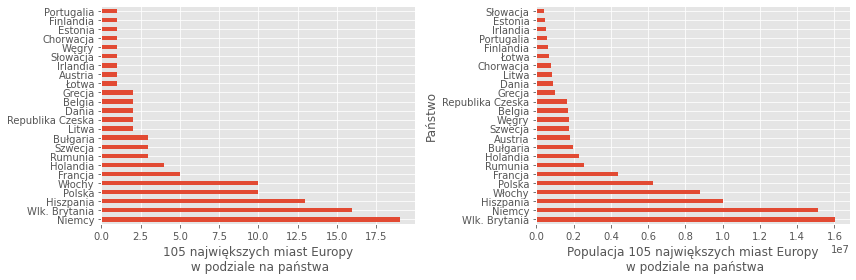

In [80]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

city_counts.plot(kind='barh', ax=ax1)
ax1.set_xlabel("105 największych miast Europy\n w podziale na państwa")
df_pop5.PopulacjaInt.plot(kind='barh', ax=ax2)
ax2.set_xlabel("Populacja 105 największych miast Europy\n w podziale na państwa")

fig.tight_layout()
fig.savefig("ch12-state-city-counts-sum.pdf")

## Szeregi czasowe

### Podstawy

In [81]:
import datetime

In [82]:
pd.date_range("2015-1-1", periods=31)

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10', '2015-01-11', '2015-01-12',
               '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16',
               '2015-01-17', '2015-01-18', '2015-01-19', '2015-01-20',
               '2015-01-21', '2015-01-22', '2015-01-23', '2015-01-24',
               '2015-01-25', '2015-01-26', '2015-01-27', '2015-01-28',
               '2015-01-29', '2015-01-30', '2015-01-31'],
              dtype='datetime64[ns]', freq='D')

In [83]:
pd.date_range(datetime.datetime(2015, 1, 1), periods=31)

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10', '2015-01-11', '2015-01-12',
               '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16',
               '2015-01-17', '2015-01-18', '2015-01-19', '2015-01-20',
               '2015-01-21', '2015-01-22', '2015-01-23', '2015-01-24',
               '2015-01-25', '2015-01-26', '2015-01-27', '2015-01-28',
               '2015-01-29', '2015-01-30', '2015-01-31'],
              dtype='datetime64[ns]', freq='D')

In [84]:
pd.date_range("2015-1-1 00:00", "2015-1-1 12:00", freq="H")

DatetimeIndex(['2015-01-01 00:00:00', '2015-01-01 01:00:00',
               '2015-01-01 02:00:00', '2015-01-01 03:00:00',
               '2015-01-01 04:00:00', '2015-01-01 05:00:00',
               '2015-01-01 06:00:00', '2015-01-01 07:00:00',
               '2015-01-01 08:00:00', '2015-01-01 09:00:00',
               '2015-01-01 10:00:00', '2015-01-01 11:00:00',
               '2015-01-01 12:00:00'],
              dtype='datetime64[ns]', freq='H')

In [85]:
ts1 = pd.Series(np.arange(31), index=pd.date_range("2015-1-1", periods=31))

In [86]:
ts1.head()

2015-01-01    0
2015-01-02    1
2015-01-03    2
2015-01-04    3
2015-01-05    4
Freq: D, dtype: int64

In [87]:
ts1["2015-1-3"]

2

In [88]:
ts1.index[2]

Timestamp('2015-01-03 00:00:00', freq='D')

In [89]:
ts1.index[2].year, ts1.index[2].month, ts1.index[2].day

(2015, 1, 3)

In [90]:
ts1.index[2].nanosecond

0

In [91]:
ts1.index[2].to_pydatetime()

datetime.datetime(2015, 1, 3, 0, 0)

In [92]:
ts2 = pd.Series(np.random.rand(2), 
                index=[datetime.datetime(2015, 1, 1), datetime.datetime(2015, 2, 1)])

In [93]:
ts2

2015-01-01    0.056112
2015-02-01    0.233067
dtype: float64

In [94]:
periods = pd.PeriodIndex([pd.Period('2015-01'), pd.Period('2015-02'), pd.Period('2015-03')])

In [95]:
ts3 = pd.Series(np.random.rand(3), periods)

In [96]:
ts3

2015-01    0.508095
2015-02    0.484224
2015-03    0.485649
Freq: M, dtype: float64

In [97]:
ts3.index

PeriodIndex(['2015-01', '2015-02', '2015-03'], dtype='period[M]', freq='M')

In [98]:
ts2.to_period('M')

2015-01    0.056112
2015-02    0.233067
Freq: M, dtype: float64

In [99]:
pd.date_range("2015-1-1", periods=12, freq="M").to_period()

PeriodIndex(['2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
             '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12'],
            dtype='period[M]', freq='M')

### Przykład z szeregami temperatur

In [100]:
!head -n 5 temperatury_zewnetrzne_2014.tsv

1388530986	4.380000
1388531586	4.250000
1388532187	4.190000
1388532787	4.060000
1388533388	4.060000


In [101]:
df1 = pd.read_csv('temperatury_zewnetrzne_2014.tsv', delimiter="\t", names=["Data", "Temperatura zewnętrzna"])

In [102]:
df2 = pd.read_csv('temperatury_wewnetrzne_2014.tsv', delimiter="\t", names=["Data", "Temperatura wewnętrzna"])

In [103]:
df1.head()

,Data,Temperatura zewnętrzna
0,1388530986,4.38
1,1388531586,4.25
2,1388532187,4.19
3,1388532787,4.06
4,1388533388,4.06


In [104]:
df2.head()

,Data,Temperatura wewnętrzna
0,1388530986,21.94
1,1388531586,22.00
2,1388532187,22.00
3,1388532787,22.00
4,1388533388,22.00


In [105]:
df1.Data = (pd.to_datetime(df1.Data.values, unit="s")
              .tz_localize('UTC').tz_convert('Europe/Stockholm'))

In [106]:
df1 = df1.set_index("Data")

In [107]:
df2.Data = (pd.to_datetime(df2.Data.values, unit="s")
              .tz_localize('UTC').tz_convert('Europe/Stockholm'))

In [108]:
df2 = df2.set_index("Data")

In [109]:
df1.head()

,Temperatura zewnętrzna
Data,
2014-01-01 00:03:06+01:00,4.38
2014-01-01 00:13:06+01:00,4.25
2014-01-01 00:23:07+01:00,4.19
2014-01-01 00:33:07+01:00,4.06
2014-01-01 00:43:08+01:00,4.06


In [110]:
df1.index[0]

Timestamp('2014-01-01 00:03:06+0100', tz='Europe/Stockholm')

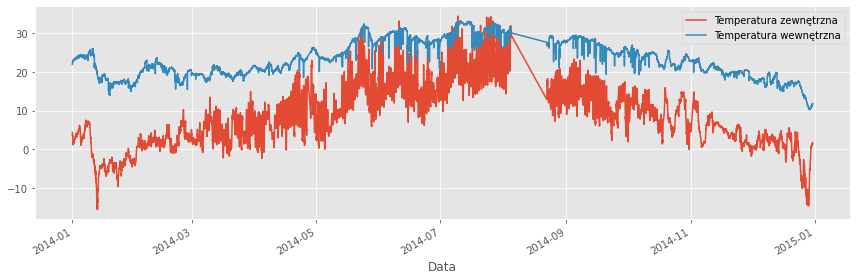

In [111]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
df1.plot(ax=ax)
df2.plot(ax=ax)

fig.tight_layout()
fig.savefig("ch12-timeseries-temperature-2014.pdf")

In [112]:
# Wybór dat ze stycznia

In [113]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49548 entries, 2014-01-01 00:03:06+01:00 to 2014-12-30 23:56:35+01:00
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperatura zewnętrzna  49548 non-null  float64
dtypes: float64(1)
memory usage: 774.2 KB


In [114]:
df1_jan = df1[(df1.index > "2014-1-1") & (df1.index < "2014-2-1")]

In [115]:
df1.index < "2014-2-1"

array([ True,  True,  True, ..., False, False, False])

In [116]:
df1_jan.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4452 entries, 2014-01-01 00:03:06+01:00 to 2014-01-31 23:56:58+01:00
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperatura zewnętrzna  4452 non-null   float64
dtypes: float64(1)
memory usage: 69.6 KB


In [117]:
df2_jan = df2["2014-1-1":"2014-1-31"]

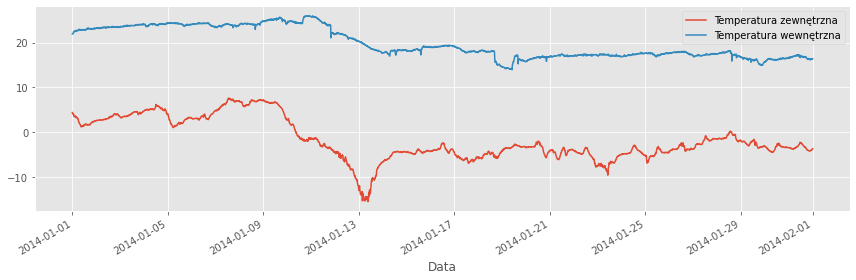

In [118]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

df1_jan.plot(ax=ax)
df2_jan.plot(ax=ax)

fig.tight_layout()
fig.savefig("ch12-timeseries-selected-month.pdf")

In [119]:
# Podział na miesiące

In [120]:
df1_month = df1.reset_index()

In [121]:
df1_month["Miesiąc"] = df1_month.Data.apply(lambda x: x.month)

In [122]:
df1_month.head()

,Data,Temperatura zewnętrzna,Miesiąc
0,2014-01-01 00:03:06+01:00,4.38,1
1,2014-01-01 00:13:06+01:00,4.25,1
2,2014-01-01 00:23:07+01:00,4.19,1
3,2014-01-01 00:33:07+01:00,4.06,1
4,2014-01-01 00:43:08+01:00,4.06,1


In [123]:
df1_month = df1_month.groupby("Miesiąc").aggregate(np.mean)

In [124]:
df2_month = df2.reset_index()

In [125]:
df2_month["Miesiąc"] = df2_month.Data.apply(lambda x: x.month)

In [126]:
df2_month = df2_month.groupby("Miesiąc").aggregate(np.mean)

In [127]:
df_month = df1_month.join(df2_month)

In [128]:
df_month.head(3)

,Temperatura zewnętrzna,Temperatura wewnętrzna
Miesiąc,,
1,-1.776646,19.862590
2,2.231613,20.231507
3,4.615437,19.597748


In [129]:
df_month = pd.concat([df.to_period("M").groupby(level=0).mean() for df in [df1, df2]], axis=1)

/Users/filip/miniconda3/envs/py3.8/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1088: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [130]:
df_month.head(3)

,Temperatura zewnętrzna,Temperatura wewnętrzna
Data,,
2014-01,-1.776646,19.862590
2014-02,2.231613,20.231507
2014-03,4.615437,19.597748


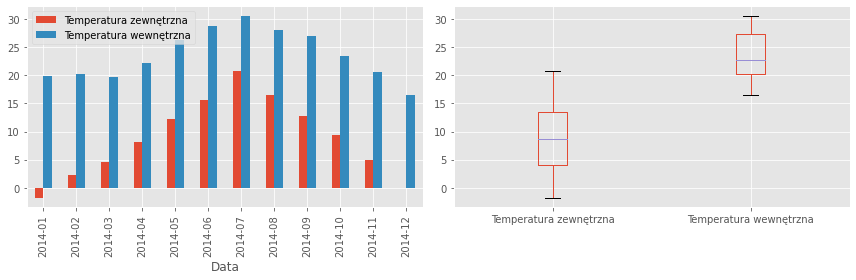

In [131]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

df_month.plot(kind='bar', ax=axes[0])
df_month.plot(kind='box', ax=axes[1])

fig.tight_layout()
fig.savefig("ch12-grouped-by-month.pdf")

In [132]:
df_month

,Temperatura zewnętrzna,Temperatura wewnętrzna
Data,,
2014-01,-1.776646,19.862590
2014-02,2.231613,20.231507
2014-03,4.615437,19.597748
2014-04,8.105193,22.149754
2014-05,12.261396,26.332160
2014-06,15.586955,28.687491
2014-07,20.780314,30.605333
2014-08,16.494823,28.099068
2014-09,12.823905,26.950366


In [133]:
# Resampling

In [134]:
df1_hour = df1.resample("H").mean()

In [135]:
df1_hour.columns = ["Temperatura zewnętrzna (średnia godzinowa)"]

In [136]:
df1_day = df1.resample("D").mean()

In [137]:
df1_day.columns = ["Temperatura zewnętrzna (średnia dzienna)"]

In [138]:
df1_week = df1.resample("7D").mean()

In [139]:
df1_week.columns = ["Temperatura zewnętrzna (średnia tygodniowa)"]

In [140]:
df1_month = df1.resample("M").mean()

In [141]:
df1_month.columns = ["Temperatura zewnętrzna (średnia miesięczna)"]

In [142]:
# df1.resample("D")

In [143]:
df_diff = (df1.resample("D").mean()["Temperatura zewnętrzna"] - df2.resample("D").mean()["Temperatura wewnętrzna"])

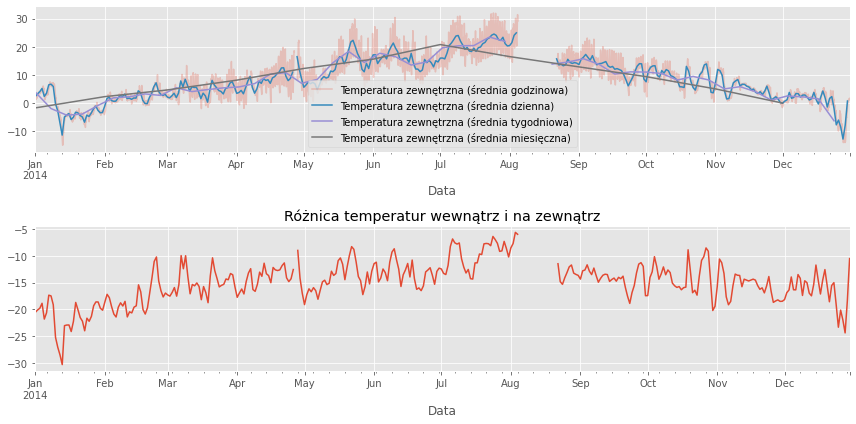

In [144]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

df1_hour.plot(ax=ax1, alpha=0.25)
df1_day.plot(ax=ax1)
df1_week.plot(ax=ax1)
df1_month.plot(ax=ax1)

df_diff.plot(ax=ax2)
ax2.set_title("Różnica temperatur wewnątrz i na zewnątrz")

fig.tight_layout()
fig.savefig("ch12-timeseries-resampled.pdf")

In [145]:
pd.concat([df1.resample("5min").mean().rename(columns={"Temperatura zewnętrzna": 'None'}),
           df1.resample("5min").ffill().rename(columns={"Temperatura zewnętrzna": 'ffill'}),
           df1.resample("5min").bfill().rename(columns={"Temperatura zewnętrzna": 'bfill'})], axis=1).head()

,None,ffill,bfill
Data,,,
2014-01-01 00:00:00+01:00,4.38,NaN,4.38
2014-01-01 00:05:00+01:00,NaN,4.38,4.25
2014-01-01 00:10:00+01:00,4.25,4.38,4.25
2014-01-01 00:15:00+01:00,NaN,4.25,4.19
2014-01-01 00:20:00+01:00,4.19,4.25,4.19


## Wybrany dzień

In [146]:
df1_dec25 = df1[(df1.index < "2014-9-1") & (df1.index >= "2014-8-1")].resample("D")

In [147]:
df1_dec25 = df1.loc["2014-12-25"]

In [148]:
df1_dec25.head(5)

,Temperatura zewnętrzna
Data,
2014-12-25 00:01:45+01:00,-4.88
2014-12-25 00:11:45+01:00,-4.94
2014-12-25 00:21:46+01:00,-5.06
2014-12-25 00:31:47+01:00,-5.06
2014-12-25 00:41:47+01:00,-5.12


In [149]:
df2_dec25 = df2.loc["2014-12-25"]

In [150]:
df2_dec25.head(5)

,Temperatura wewnętrzna
Data,
2014-12-25 00:01:45+01:00,16.31
2014-12-25 00:11:45+01:00,16.25
2014-12-25 00:21:46+01:00,16.31
2014-12-25 00:31:47+01:00,16.31
2014-12-25 00:41:47+01:00,16.25


In [151]:
df1_dec25.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperatura zewnętrzna,144.0,-7.788819,1.456085,-10.06,-9.075,-7.75,-6.8625,-4.88


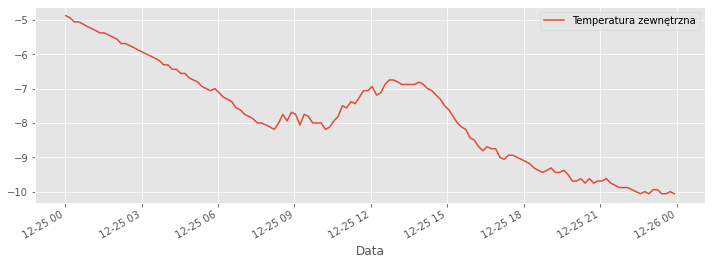

In [152]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

df1_dec25.plot(ax=ax)

fig.savefig("ch12-timeseries-selected-month.pdf")

In [153]:
df1.index

DatetimeIndex(['2014-01-01 00:03:06+01:00', '2014-01-01 00:13:06+01:00',
               '2014-01-01 00:23:07+01:00', '2014-01-01 00:33:07+01:00',
               '2014-01-01 00:43:08+01:00', '2014-01-01 00:53:08+01:00',
               '2014-01-01 01:03:09+01:00', '2014-01-01 01:13:09+01:00',
               '2014-01-01 01:23:10+01:00', '2014-01-01 01:33:26+01:00',
               ...
               '2014-12-30 22:26:30+01:00', '2014-12-30 22:36:31+01:00',
               '2014-12-30 22:46:31+01:00', '2014-12-30 22:56:32+01:00',
               '2014-12-30 23:06:32+01:00', '2014-12-30 23:16:33+01:00',
               '2014-12-30 23:26:33+01:00', '2014-12-30 23:36:34+01:00',
               '2014-12-30 23:46:35+01:00', '2014-12-30 23:56:35+01:00'],
              dtype='datetime64[ns, Europe/Stockholm]', name='Data', length=49548, freq=None)

# Biblioteka Seaborn

In [154]:
sns.set(style="darkgrid")

In [155]:
#sns.set(style="whitegrid")

In [156]:
df1 = pd.read_csv('temperatury_zewnetrzne_2014.tsv', delimiter="\t", names=["Data", "Temperatura zewnętrzna"])
df1.Data = pd.to_datetime(df1.Data.values, unit="s").tz_localize('UTC').tz_convert('Europe/Stockholm')

df1 = df1.set_index("Data").resample("10min").mean()
df2 = pd.read_csv('temperatury_wewnetrzne_2014.tsv', delimiter="\t", names=["Data", "Temperatura wewnętrzna"])
df2.Data = pd.to_datetime(df2.Data.values, unit="s").tz_localize('UTC').tz_convert('Europe/Stockholm')
df2 = df2.set_index("Data").resample("10min").mean()
df_temp = pd.concat([df1, df2], axis=1)

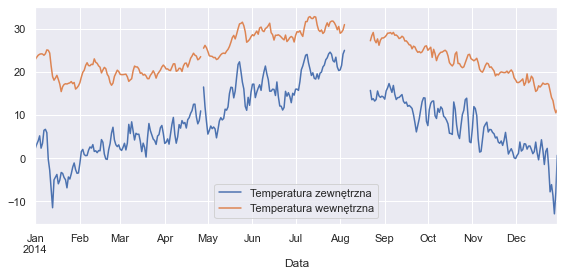

In [157]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
df_temp.resample("D").mean().plot(y=["Temperatura zewnętrzna", "Temperatura wewnętrzna"], ax=ax)
fig.tight_layout()
fig.savefig("ch12-seaborn-plot.pdf")

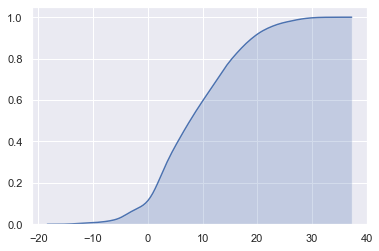

In [158]:
sns.kdeplot(df_temp["Temperatura zewnętrzna"].dropna().values, shade=True, cumulative=True);

/Users/filip/miniconda3/envs/py3.8/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1088: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
/Users/filip/miniconda3/envs/py3.8/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1088: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


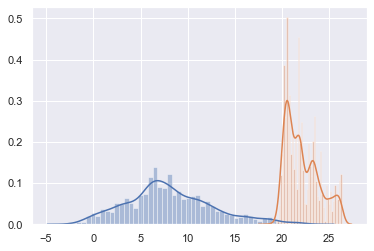

In [159]:
sns.distplot(df_temp.to_period("M")["Temperatura zewnętrzna"]["2014-04"].dropna().values, bins=50);
sns.distplot(df_temp.to_period("M")["Temperatura wewnętrzna"]["2014-04"].dropna().values, bins=50);

plt.savefig("ch12-seaborn-distplot.pdf")

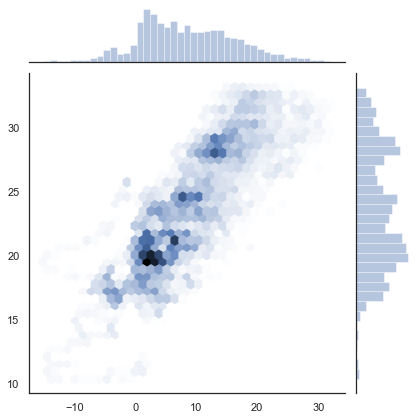

In [160]:
with sns.axes_style("white"):
    sns.jointplot(df_temp.resample("H").mean()["Temperatura zewnętrzna"].values,
                  df_temp.resample("H").mean()["Temperatura wewnętrzna"].values, kind="hex");
    
plt.savefig("ch12-seaborn-jointplot.pdf")

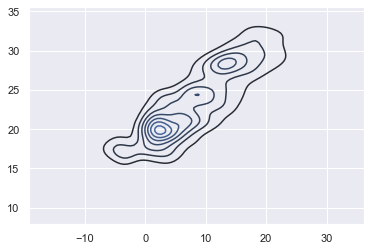

In [161]:
sns.kdeplot(df_temp.resample("H").mean()["Temperatura zewnętrzna"].dropna().values,
            df_temp.resample("H").mean()["Temperatura wewnętrzna"].dropna().values, shade=False);

plt.savefig("ch12-seaborn-kdeplot.pdf")

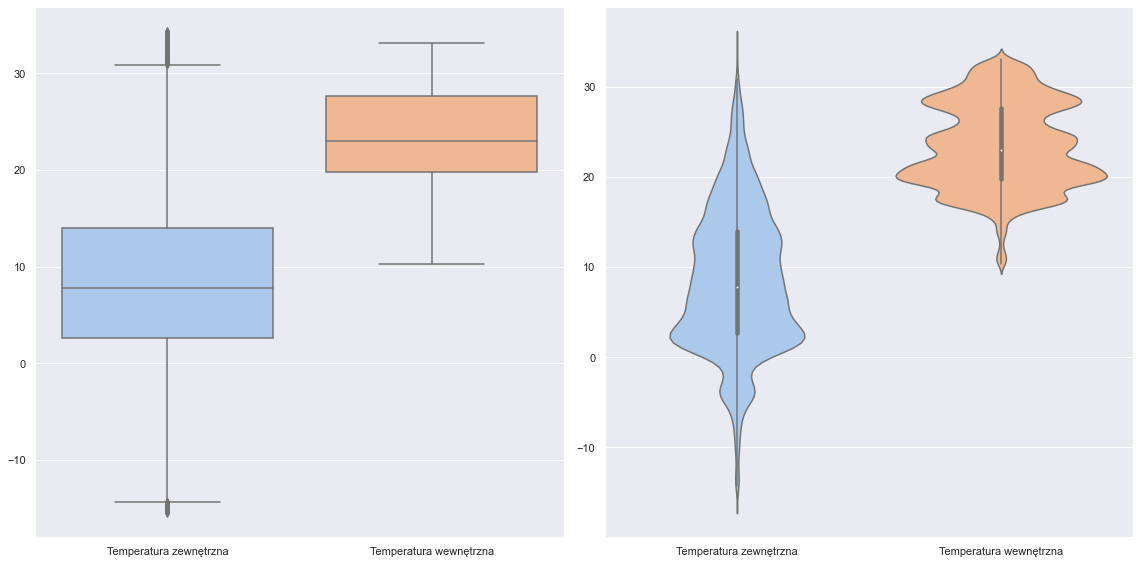

In [162]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

sns.boxplot(data=df_temp.dropna(), ax=ax1, palette="pastel")
sns.violinplot(data=df_temp.dropna(), ax=ax2, palette="pastel")


fig.tight_layout()
fig.savefig("ch12-seaborn-boxplot-violinplot.pdf")

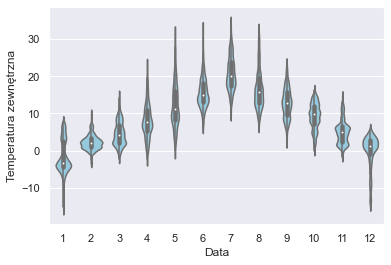

In [163]:
sns.violinplot(x=df_temp.dropna().index.month, y=df_temp.dropna()["Temperatura zewnętrzna"], color="skyblue");

plt.savefig("ch12-seaborn-violinplot.pdf")

In [164]:
df_temp["Miesiąc"] = df_temp.index.month
df_temp["Godzina"] = df_temp.index.hour

In [165]:
df_temp.head()

,Temperatura zewnętrzna,Temperatura wewnętrzna,Miesiąc,Godzina
Data,,,,
2014-01-01 00:00:00+01:00,4.38,21.94,1,0
2014-01-01 00:10:00+01:00,4.25,22.00,1,0
2014-01-01 00:20:00+01:00,4.19,22.00,1,0
2014-01-01 00:30:00+01:00,4.06,22.00,1,0
2014-01-01 00:40:00+01:00,4.06,22.00,1,0


In [166]:
table = pd.pivot_table(df_temp, values='Temperatura zewnętrzna', index=['Miesiąc'], columns=['Godzina'], aggfunc=np.mean)

In [167]:
table

Godzina,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Miesiąc,,,,,,,,,,,,,,,,,,,,,
1,-1.692312,-1.750162,-1.826649,-1.879086,-1.922527,-1.968065,-2.020914,-2.035806,-2.101774,-2.001022,...,-1.457849,-1.696935,-1.814194,-1.812258,-1.853297,-1.898432,-1.839730,-1.806486,-1.854462,-1.890811
2,1.613690,1.521190,1.479405,1.464371,1.506407,1.485595,1.499167,1.516946,1.669226,2.067725,...,3.573593,3.360741,2.939390,2.501607,2.357425,2.236190,2.204458,2.137619,2.024671,1.896190
3,3.192366,2.866774,2.628000,2.524140,2.384140,2.235538,2.243387,2.622258,3.419301,4.466290,...,7.790323,7.930914,7.595892,6.770914,5.731508,4.983784,4.437419,4.022312,3.657903,3.407258
4,5.832738,5.336012,4.926667,4.597059,4.380000,4.109769,4.123699,4.741437,5.878035,7.272299,...,12.175556,12.500059,12.494483,12.361156,11.989240,10.454881,8.857619,7.712619,6.974762,6.293512
5,9.792204,9.369351,9.009839,8.670914,8.463387,8.446919,8.772324,9.562742,10.723622,12.047717,...,15.542581,15.744624,15.784839,15.799570,17.009892,15.685161,13.632796,12.216290,11.291237,10.622849
6,13.209556,12.792889,12.382889,11.967889,11.735778,11.886667,12.503778,13.338167,14.343444,15.665475,...,18.630556,18.866292,18.680611,18.529832,20.057877,18.853389,16.969777,15.675111,14.658778,13.898167
7,17.956344,17.348641,16.793152,16.309892,16.001559,15.986774,16.506613,17.478226,18.850054,20.533763,...,24.598441,25.030000,24.869194,24.764409,26.155161,24.896505,22.550269,20.882649,19.699022,18.822634
8,14.498205,13.960128,13.555128,12.995641,12.651410,12.485974,12.680130,13.403506,14.578780,16.170833,...,20.473810,20.292381,20.328795,19.642436,19.373846,18.713462,17.034872,15.843590,15.146154,14.596667
9,11.133000,10.725667,10.362444,9.976833,9.729333,9.503944,9.357500,9.689778,10.600778,11.829106,...,16.336983,16.828268,17.031056,16.786983,15.853556,14.534637,13.350444,12.545278,11.954190,11.399056


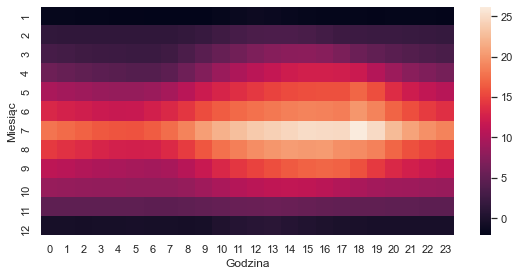

In [168]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.heatmap(table, ax=ax);

fig.tight_layout()
fig.savefig("ch12-seaborn-heatmap.pdf")